# 1. Thêm các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split

# 2. Đọc dữ liệu ALNY

In [2]:
df = pd.read_csv('../Datasets/ALNY_processed.csv')
df1 = df.reset_index()['Close']

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [4]:
choose = 3  # 1, 2

if choose == 1:
    # 7:3 ratio for train:test
    train_size = int(0.7 * len(df1))
    test_size = len(df1) - train_size

    train_data = df1[:train_size]
    test_data = df1[train_size:]

elif choose == 2:
    # 6:4 ratio for train:test
    train_size = int(0.6 * len(df1))
    test_size = len(df1) - train_size

    train_data = df1[:train_size]
    test_data = df1[train_size:]

elif choose == 3:
    # 8:2 ratio for train:test
    train_size = int(0.8 * len(df1))
    test_size = len(df1) - train_size

    train_data = df1[:train_size]
    test_data = df1[train_size:]

print("Train: ", train_size)
print("Test: ", test_size)


Train:  1461
Test:  366


In [5]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [6]:
X_train.shape

(1360, 100)

# 3. Triển khai mô hình

## 3.1 Mô hình Random Forest

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [8]:
# Khởi tạo mô hình RandomForestRegressor
# rf_model = RandomForestRegressor()
# grid_rf = {
# 'n_estimators': [20, 50, 100, 500],
# 'max_depth': np.arange(1, 15, 1),
# 'min_samples_split': [2, 10, 9],
# 'min_samples_leaf': np.arange(1, 15, 2, dtype=int),
# 'bootstrap': [True, False],
# 'random_state': [1, 2, 30, 42]
# }

# rscv = RandomizedSearchCV(estimator=rf_model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
# rscv_fit = rscv.fit(X_train, y_train)
# best_parameters = rscv_fit.best_params_

# print("Best parameters found: ", best_parameters)

In [9]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [10]:
rf_train_predict = rf_model.predict(X_train)
rf_y_pred = rf_model.predict(X_test)

### Dự đoán 90 ngày tiếp theo

In [11]:
time_step = 100 
x_input = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input[0])
rf_lst_output_90 = []
i = 0
while i < 90:
    if len(temp_input) > time_step:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, time_step))
        yhat = rf_model.predict(x_input)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        rf_lst_output_90.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, time_step))
        yhat = rf_model.predict(x_input)
        temp_input.extend(yhat.tolist())
        rf_lst_output_90.extend(yhat.tolist())
        i += 1

rf_lst_output_90 = np.array(rf_lst_output_90).reshape(-1, 1)

## 3.2 Mô hình Support Vector Regressor

In [12]:
from sklearn.svm import SVR

In [13]:
# svr_model = SVR()

# grid_svr = {
# 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
# 'C': [0.1, 1, 10, 100],
# 'gamma': ['scale', 'auto'],
# 'degree': np.arange(2, 5, 1) 
# }
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# rscv_svr = RandomizedSearchCV(estimator=svr_model, param_distributions=grid_svr, cv=3, n_jobs=-1, verbose=2, n_iter=200)
# rscv_svr_fit = rscv_svr.fit(X_train, y_train)
# best_parameters = rscv_svr_fit.best_params_

# print("Best parameters found: ", best_parameters)

In [14]:
svr_model = SVR()
svr_model.fit(X_train, y_train)

SVR()

In [15]:
# Dự đoán trên tập huấn luyện, tập kiểm tra và tập xác thực
svr_train_predict = svr_model.predict(X_train)
svr_y_pred = svr_model.predict(X_test)

### Dự báo cho 90 ngày tiếp theo

In [16]:
time_step = 100 
x_input = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input[0])
svr_lst_output_90 = []
i = 0
while i < 90:
    if len(temp_input) > time_step:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, time_step))
        yhat = svr_model.predict(x_input)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        svr_lst_output_90.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, time_step))
        yhat = svr_model.predict(x_input)
        temp_input.extend(yhat.tolist())
        svr_lst_output_90.extend(yhat.tolist())
        i += 1

svr_lst_output_90 = np.array(svr_lst_output_90).reshape(-1, 1)


## 3.3 Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Dự đoán trên tập huấn luyện, tập kiểm tra và tập xác thực
lr_train_predict = lr_model.predict(X_train)
lr_y_pred = lr_model.predict(X_test)

In [20]:
time_step = 100 
x_input = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input[0])
lr_lst_output_90 = []
i = 0
while i < 90:
    if len(temp_input) > time_step:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, time_step))
        yhat = svr_model.predict(x_input)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lr_lst_output_90.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, time_step))
        yhat = svr_model.predict(x_input)
        temp_input.extend(yhat.tolist())
        lr_lst_output_90.extend(yhat.tolist())
        i += 1

lr_lst_output_90 = np.array(lr_lst_output_90).reshape(-1, 1)


## 3.4 Mô hình Stacking

In [21]:
from sklearn.ensemble import StackingRegressor

## StackingSVR

In [22]:
#Xây dựng base model
base_models = [
    # ('rf', rf_model),
    ('svr', svr_model)
]
meta_model = lr_model

In [23]:
# Khởi tạo mô hình Stacking với các base model
stackingSVR_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model
)

In [24]:
# Huấn luyện mô hình stacking
stackingSVR_model.fit(X_train, y_train)

StackingRegressor(estimators=[('svr', SVR())],
                  final_estimator=LinearRegression())

In [25]:
#Dự đoán
stackingSVR_train_predict = stackingSVR_model.predict(X_train)
stackingSVR_y_pred = stackingSVR_model.predict(X_test)

In [26]:
stackingSVR_y_pred

array([0.67454487, 0.6730054 , 0.67278556, 0.67351046, 0.67496953,
       0.67718854, 0.67509301, 0.67700488, 0.67608596, 0.67628796,
       0.67892444, 0.68082483, 0.68164616, 0.6818344 , 0.67470669,
       0.66377018, 0.65774539, 0.65491231, 0.6527427 , 0.64844175,
       0.65383891, 0.65150604, 0.64975162, 0.65005399, 0.65040203,
       0.65123124, 0.65321928, 0.65612776, 0.6619857 , 0.6629911 ,
       0.66716999, 0.67349155, 0.68307028, 0.69210942, 0.69910053,
       0.70772944, 0.7097737 , 0.71032132, 0.71257651, 0.71620037,
       0.72275244, 0.72148091, 0.71447271, 0.70870604, 0.70054021,
       0.69333581, 0.68727895, 0.68330021, 0.6824111 , 0.68209372,
       0.68669539, 0.68739275, 0.68344613, 0.67977123, 0.6728835 ,
       0.66966774, 0.67296159, 0.66941276, 0.66741211, 0.66431843,
       0.66073216, 0.65630824, 0.65585948, 0.65548256, 0.65474552,
       0.65033731, 0.64535063, 0.64386878, 0.6417799 , 0.64320376,
       0.64172752, 0.63981748, 0.63770295, 0.63713168, 0.63791

### Dự đoán 90 ngày tiếp theo

In [27]:
# Dự đoán 90 ngày tiếp theo
time_step = 100  # Giả sử bạn đang sử dụng 100 bước thời gian
x_input = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input[0])
stackingSVR_lst_output_90 = []
i = 0

while i < 90:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, time_step))
        yhat = stackingSVR_model.predict(x_input)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        stackingSVR_lst_output_90.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, time_step))
        yhat = stackingSVR_model.predict(x_input)
        temp_input.extend(yhat.tolist())
        stackingSVR_lst_output_90.extend(yhat.tolist())
        i += 1

stackingSVR_lst_output_90 = np.array(stackingSVR_lst_output_90).reshape(-1, 1)


## StackingRandomForest

In [28]:
#Xây dựng base model
base_models = [
    ('rf', rf_model)
]
meta_model = lr_model

In [29]:
# Khởi tạo mô hình Stacking với các base model
stackingRF_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model
)

In [30]:
# Huấn luyện mô hình stacking
stackingRF_model.fit(X_train, y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor())],
                  final_estimator=LinearRegression())

In [31]:
#Dự đoán
stackingRF_train_predict = stackingRF_model.predict(X_train)
stackingRF_y_pred = stackingRF_model.predict(X_test)

In [32]:
stackingRF_y_pred

array([0.73460778, 0.73447779, 0.73944323, 0.74315519, 0.7543283 ,
       0.78851653, 0.79871791, 0.8189401 , 0.81618231, 0.81242046,
       0.8107953 , 0.81218438, 0.81218579, 0.83725537, 0.79716652,
       0.69768565, 0.71055629, 0.71148938, 0.69465312, 0.70672278,
       0.77527911, 0.72234209, 0.71982178, 0.71449871, 0.71730709,
       0.71879666, 0.70232998, 0.72813732, 0.75207569, 0.7320418 ,
       0.75453136, 0.77631197, 0.77822521, 0.81049036, 0.8194207 ,
       0.83896626, 0.78828185, 0.78469426, 0.78263698, 0.83026357,
       0.85734618, 0.84460832, 0.81048403, 0.79099468, 0.77481327,
       0.74769273, 0.72356184, 0.72247278, 0.74726975, 0.74987086,
       0.78393051, 0.78395299, 0.77840157, 0.75836065, 0.71141841,
       0.7113088 , 0.72152635, 0.71678153, 0.71510156, 0.71614636,
       0.69934313, 0.72169146, 0.7267651 , 0.72564512, 0.72498325,
       0.70390456, 0.69852247, 0.69910916, 0.69755074, 0.69996214,
       0.70432332, 0.72331874, 0.72480197, 0.72629153, 0.73402

### Dự đoán 90 ngày tiếp theo

In [33]:
# Dự đoán 90 ngày tiếp theo
time_step = 100  # Giả sử bạn đang sử dụng 100 bước thời gian
x_input = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input[0])
stackingRF_lst_output_90 = []
i = 0

while i < 90:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, time_step))
        yhat = stackingRF_model.predict(x_input)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        stackingRF_lst_output_90.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, time_step))
        yhat = stackingRF_model.predict(x_input)
        temp_input.extend(yhat.tolist())
        stackingRF_lst_output_90.extend(yhat.tolist())
        i += 1

stackingRF_lst_output_90 = np.array(stackingRF_lst_output_90).reshape(-1, 1)


# 4. Đánh giá mô hình

## 4.1 Đánh giá các chỉ số RMSE, MAE, MAPE trên tập test

In [34]:
list_mectrics_test = {
    'Model': ['Random Forest', 'SVR', 'LR', 'StackingSVR', 'StackingRF'],
    'MAE': [round(metrics.mean_absolute_error(y_test, rf_y_pred), 4),
            round(metrics.mean_absolute_error(y_test, svr_y_pred), 4),
            round(metrics.mean_absolute_error(y_test, lr_y_pred), 4),
            round(metrics.mean_absolute_error(y_test, stackingSVR_y_pred), 4),
            round(metrics.mean_absolute_error(y_test, stackingRF_y_pred), 4)],
    'RMSE': [round(np.sqrt(round(metrics.mean_squared_error(y_test, rf_y_pred), 4)), 4),
             round(np.sqrt(round(metrics.mean_squared_error(y_test, svr_y_pred), 4)), 4),
             round(np.sqrt(round(metrics.mean_squared_error(y_test, lr_y_pred), 4)), 4),
             round(np.sqrt(round(metrics.mean_squared_error(y_test, stackingSVR_y_pred), 4)), 4),
             round(np.sqrt(round(metrics.mean_squared_error(y_test, stackingRF_y_pred), 4)), 4)],
    'MAPE(%)': [round(metrics.mean_absolute_percentage_error(y_test, rf_y_pred)*100, 4),
             round(metrics.mean_absolute_percentage_error(y_test, svr_y_pred)*100, 4),
             round(metrics.mean_absolute_percentage_error(y_test, lr_y_pred)*100, 4),
             round(metrics.mean_absolute_percentage_error(y_test, stackingSVR_y_pred)*100, 4),
             round(metrics.mean_absolute_percentage_error(y_test, stackingRF_y_pred)*100, 4)]
}

df_test = pd.DataFrame(list_mectrics_test)

print(df_test)


           Model     MAE    RMSE  MAPE(%)
0  Random Forest  0.0175  0.0224   2.6846
1            SVR  0.0362  0.0447   5.6009
2             LR  0.0130  0.0200   2.0261
3    StackingSVR  0.0731  0.0843  11.0605
4     StackingRF  0.0267  0.0332   4.0935


# 5. Trực quan

## 5.1 Mô hình Random Forest 

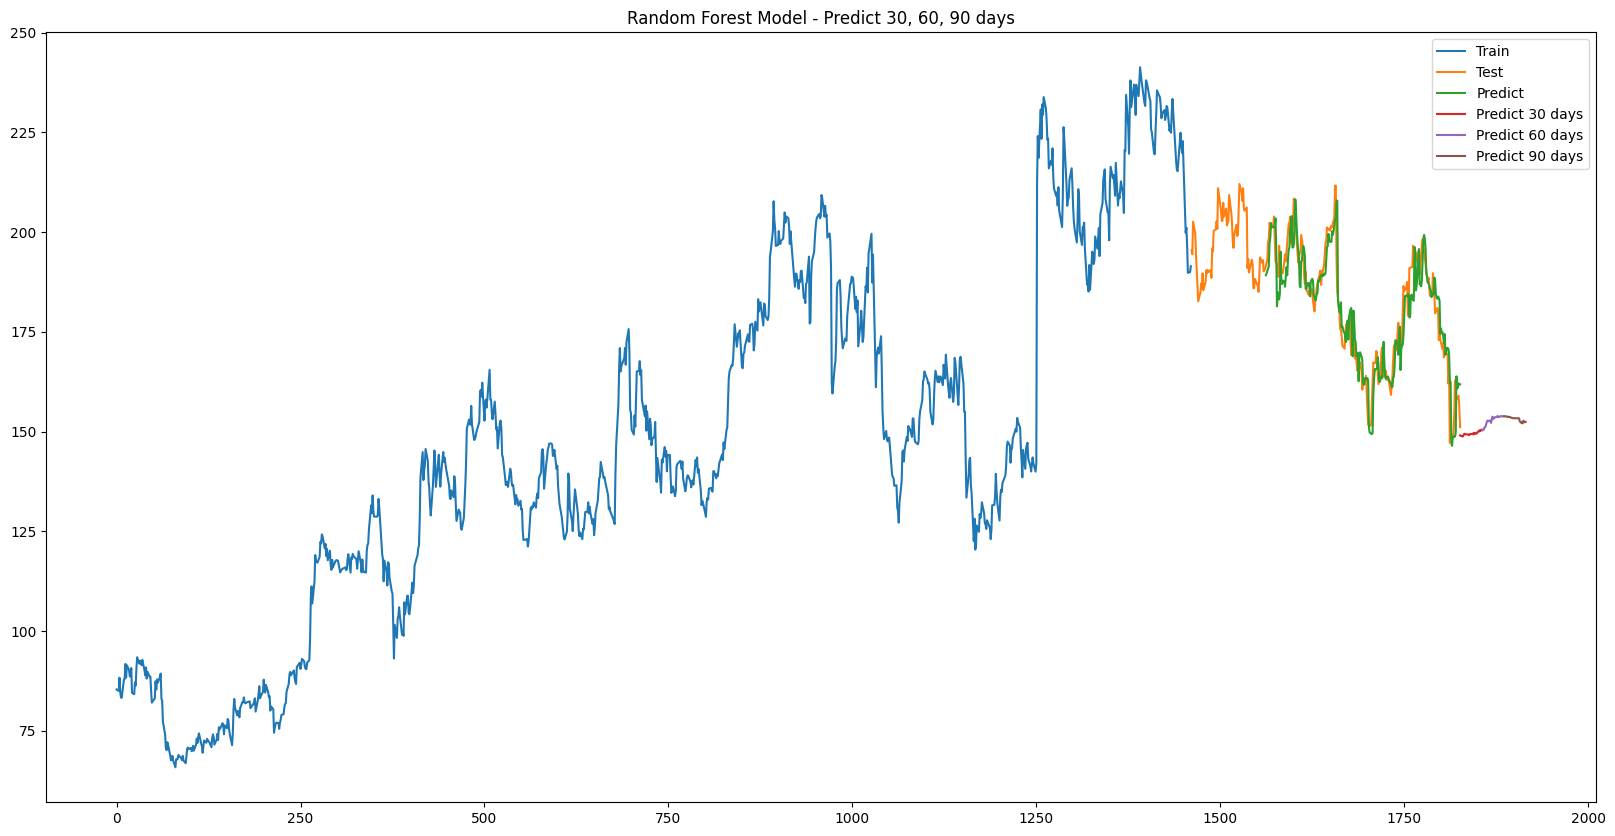

In [35]:
plt.figure(figsize=(20, 10))

# Plot training data
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data), label='Train')

# Plot testing data
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data), label='Test')

# Plot predictions on the test set
test_pred_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_pred_index, scaler.inverse_transform(rf_y_pred.reshape(-1, 1)), label='Predict')

# Plot the next 90 days predictions, divided into three segments
predict_data_index_30 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(predict_data_index_30, scaler.inverse_transform(rf_lst_output_90[:30]), label='Predict 30 days')

predict_data_index_60 = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
plt.plot(predict_data_index_60, scaler.inverse_transform(rf_lst_output_90[30:60]), label='Predict 60 days')

predict_data_index_90 = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
plt.plot(predict_data_index_90, scaler.inverse_transform(rf_lst_output_90[60:90]), label='Predict 90 days')

# Add legend and title
plt.legend()
plt.title("Random Forest Model - Predict 30, 60, 90 days")
plt.show()


## 5.2 Mô hình SVR

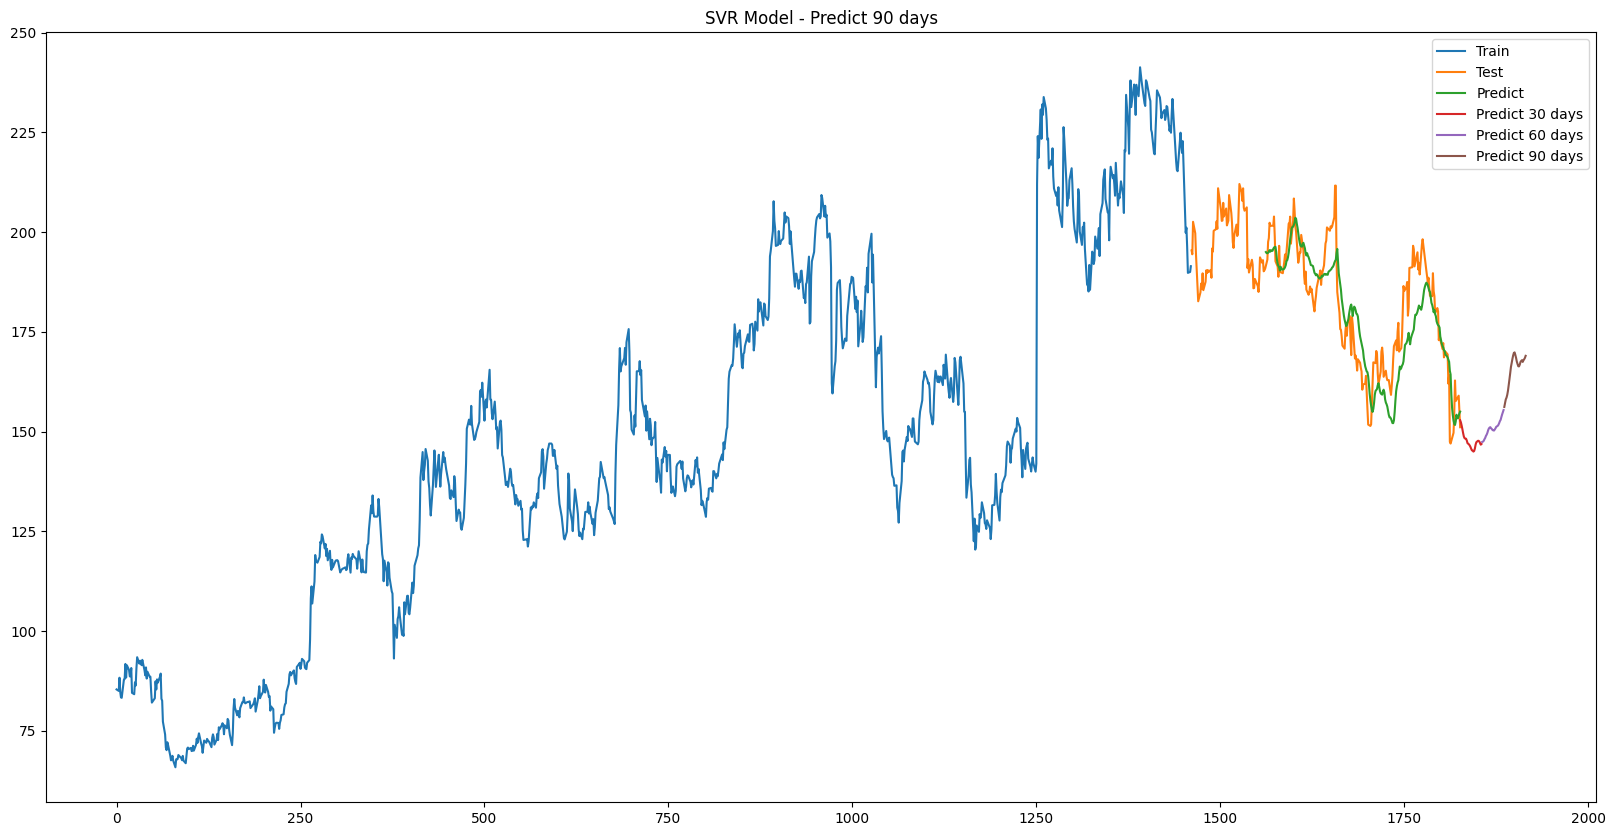

In [36]:
plt.figure(figsize=(20, 10))

# Plot training data
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data), label='Train')

# Plot testing data
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data), label='Test')

# Plot predictions on the test set
test_pred_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_pred_index, scaler.inverse_transform(svr_y_pred.reshape(-1, 1)), label='Predict')

# Plot the next 90 days predictions, divided into three segments
predict_data_index_30 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(predict_data_index_30, scaler.inverse_transform(svr_lst_output_90[:30]), label='Predict 30 days')

predict_data_index_60 = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
plt.plot(predict_data_index_60, scaler.inverse_transform(svr_lst_output_90[30:60]), label='Predict 60 days')

predict_data_index_90 = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
plt.plot(predict_data_index_90, scaler.inverse_transform(svr_lst_output_90[60:90]), label='Predict 90 days')

# Add legend and title
plt.legend()
plt.title("SVR Model - Predict 90 days")
plt.show()


## 5.3 Mô hình Linear Regression

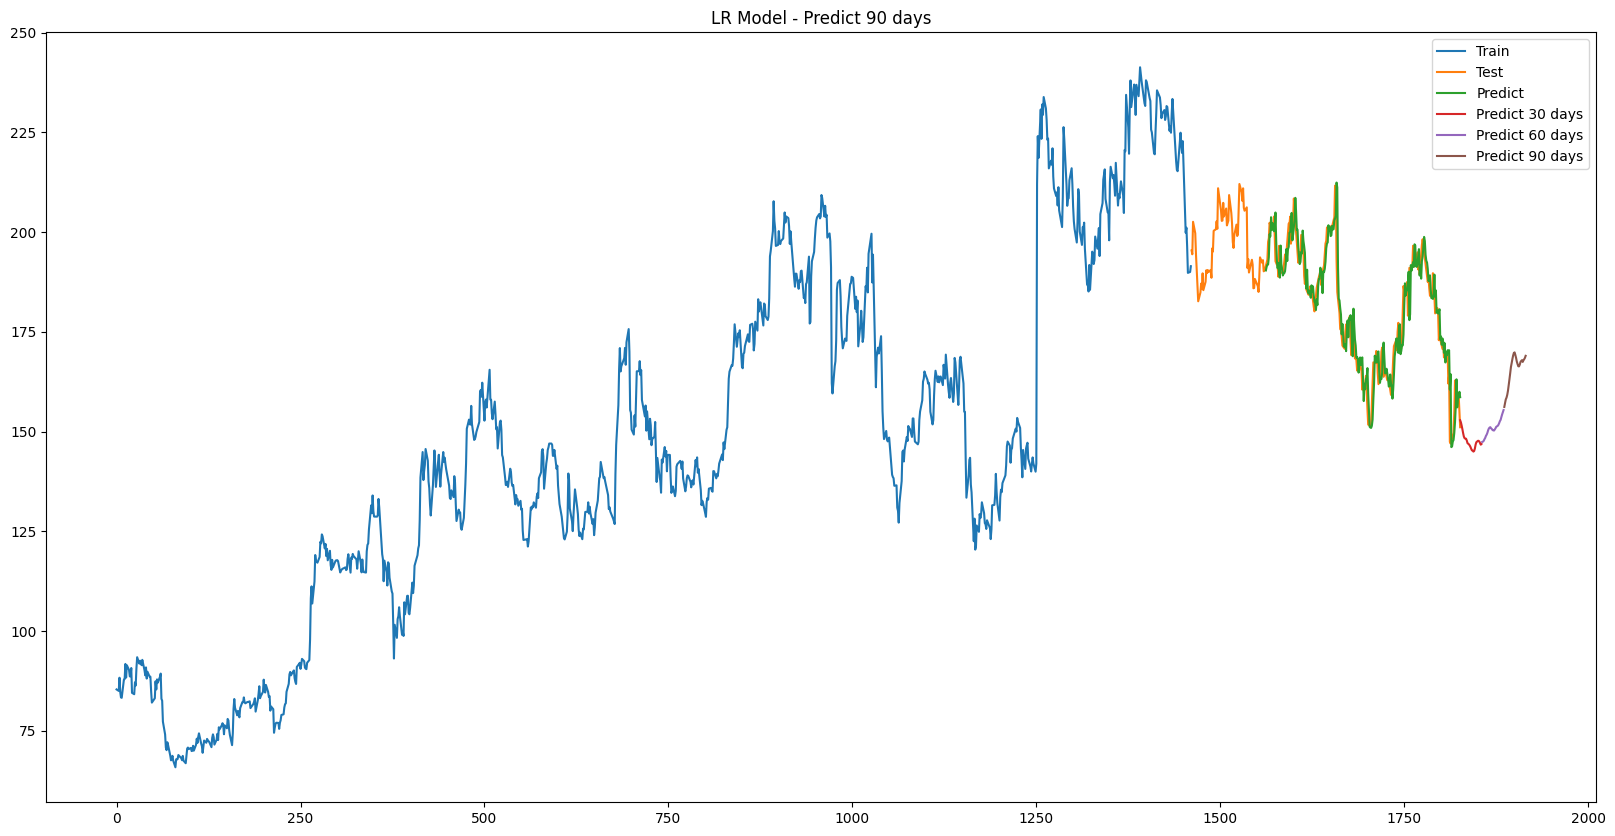

In [37]:
plt.figure(figsize=(20, 10))

# Plot training data
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data), label='Train')

# Plot testing data
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data), label='Test')

# Plot predictions on the test set
test_pred_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_pred_index, scaler.inverse_transform(lr_y_pred.reshape(-1, 1)), label='Predict')

# Plot the next 90 days predictions, divided into three segments
predict_data_index_30 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(predict_data_index_30, scaler.inverse_transform(lr_lst_output_90[:30]), label='Predict 30 days')

predict_data_index_60 = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
plt.plot(predict_data_index_60, scaler.inverse_transform(lr_lst_output_90[30:60]), label='Predict 60 days')

predict_data_index_90 = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
plt.plot(predict_data_index_90, scaler.inverse_transform(lr_lst_output_90[60:90]), label='Predict 90 days')

# Add legend and title
plt.legend()
plt.title("LR Model - Predict 90 days")
plt.show()


## 5.4 Mô hình Stacking 

## StackingSVR

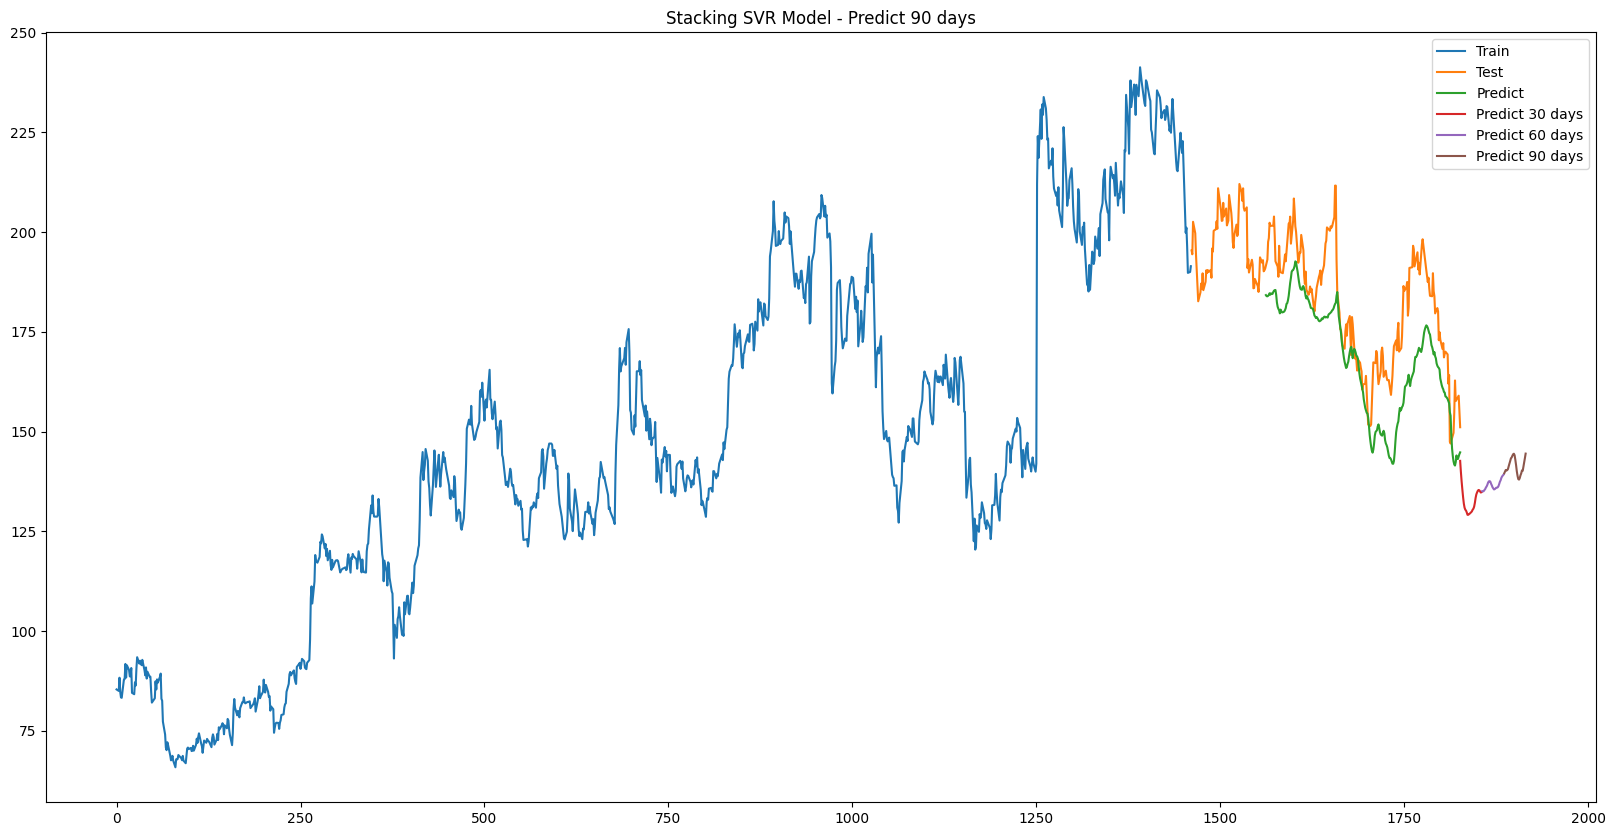

In [38]:
plt.figure(figsize=(20, 10))

# Plot training data
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data), label='Train')

# Plot testing data
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data), label='Test')

# Plot predictions on the test set
test_pred_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_pred_index, scaler.inverse_transform(stackingSVR_y_pred.reshape(-1, 1)), label='Predict')

# Plot the next 90 days predictions, divided into three segments
predict_data_index_30 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(predict_data_index_30, scaler.inverse_transform(stackingSVR_lst_output_90[:30]), label='Predict 30 days')

predict_data_index_60 = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
plt.plot(predict_data_index_60, scaler.inverse_transform(stackingSVR_lst_output_90[30:60]), label='Predict 60 days')

predict_data_index_90 = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
plt.plot(predict_data_index_90, scaler.inverse_transform(stackingSVR_lst_output_90[60:90]), label='Predict 90 days')

# Add legend and title
plt.legend()
plt.title("Stacking SVR Model - Predict 90 days")
plt.show()


## StackingRF

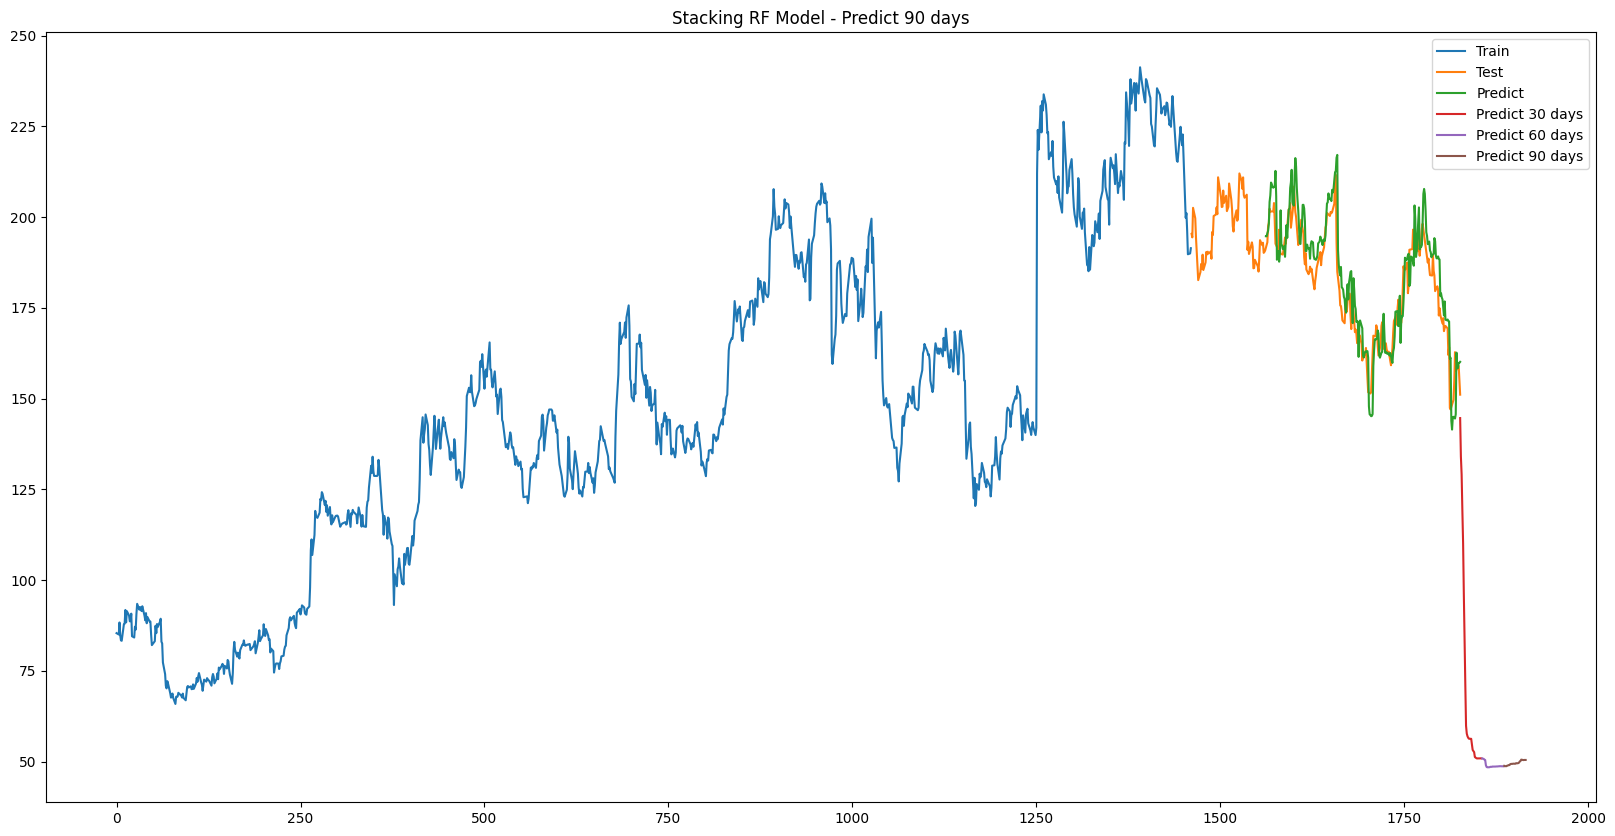

In [39]:
plt.figure(figsize=(20, 10))

# Plot training data
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data), label='Train')

# Plot testing data
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data), label='Test')

# Plot predictions on the test set
test_pred_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_pred_index, scaler.inverse_transform(stackingRF_y_pred.reshape(-1, 1)), label='Predict')

# Plot the next 90 days predictions, divided into three segments
predict_data_index_30 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(predict_data_index_30, scaler.inverse_transform(stackingRF_lst_output_90[:30]), label='Predict 30 days')

predict_data_index_60 = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
plt.plot(predict_data_index_60, scaler.inverse_transform(stackingRF_lst_output_90[30:60]), label='Predict 60 days')

predict_data_index_90 = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
plt.plot(predict_data_index_90, scaler.inverse_transform(stackingRF_lst_output_90[60:90]), label='Predict 90 days')

# Add legend and title
plt.legend()
plt.title("Stacking RF Model - Predict 90 days")
plt.show()
